## Setup

In [14]:
import sys; sys.path.append('../' * 4)

## Libs

In [15]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from lib.preprocessing.select.split_io import split_io
# from lib.preprocessing.transform.encode.one_hot import one_hot
from lib.preprocessing.sequential import sequential as preprocessing

# Dataset

In [18]:
dataset = pd.read_csv(sys.path[-1] + '/datasets/pack_2/exams_performance/data.csv')

In [19]:
dataset.loc[0]

gender                                    female
race/ethnicity                           group B
parental level of education    bachelor's degree
lunch                                   standard
test preparation course                     none
math score                                    72
reading score                                 72
writing score                                 74
Name: 0, dtype: object

In [33]:
X, Y = preprocessing(dataset.dropna(),
  [
    'one_hot(["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"], "pd")',
    'aggregate_mean(["math score", "reading score", "writing score"], "score", "pd")',
    'split_io("score")',
  ]
)

In [34]:
len(X) * 0.8

800.0

## Model

In [35]:
regressor = LinearRegression()

In [36]:
split = int(len(X)*0.8)

In [37]:
# regressor.fit(X[:split], Y[:split])
regressor.fit(X[:split], Y[:split])

LinearRegression()

In [38]:
predicted = regressor.predict(X[split:])
actual = np.array(Y[split:])

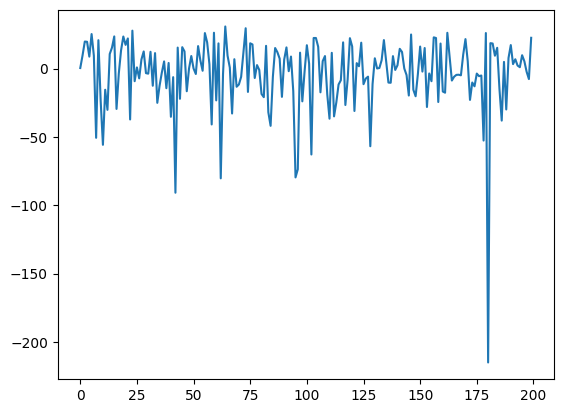

In [39]:
plt.plot((actual - predicted)/actual * 100, label='wrong %')
plt.show()


In [40]:
regressor.coef_

array([ 3.35126152e+14,  3.35126152e+14,  2.07688375e+14,  2.07688375e+14,
        2.07688375e+14,  2.07688375e+14,  2.07688375e+14,  1.58551460e+15,
        1.58551460e+15,  1.58551460e+15,  1.58551460e+15,  1.58551460e+15,
        1.58551460e+15,  6.99693851e+13,  6.99693851e+13, -2.51858177e+14,
       -2.51858177e+14])